/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


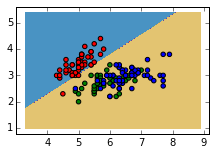

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Perceptron
import numpy as np

%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:,:2]  # only use 2 features
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

fig = plt.figure()
h = 0.02

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# create maker for data
markers = []
for i in y:
    if i == 0:
        markers.append('r')
    elif i == 1:
        markers.append('g')
    else:
        markers.append('b')

fig = plt.figure(figsize=(20, 5))
i = 1
iter = 10
# start training
#for e in range(1, iter):
#print '\nStarting epoch ', e
#clf = Perceptron(n_iter=e, verbose=5).fit(X, y)
clf = Perceptron(alpha=0.1, class_weight=None, eta0=4.0, fit_intercept=True, n_iter=500, n_jobs=3, penalty=None, random_state=0, shuffle=False,verbose=0, warm_start=False).fit(X,y)


#clf = Perceptron(n_iter=e, verbose=5).fit(X_train, y_train)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


#plt.title('Epoch %s' % e)
ax = plt.subplot(2, 5, i)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=markers, cmap=plt.cm.Paired)
    #ax.scatter(X_train[:, 0], X_train[:, 1], c=markers, cmap=plt.cm.Paired)
    #i = i + 1

"""
if clf.score(X, y) == 1:
    print 'converged in epoch', e
    break
"""

plt.show()
fig.savefig('graph.png')

